# Análisis de Demanda Comercial No Regulada por CIIU - Industria Alimentaria

Este notebook tiene como objetivo analizar el comportamiento del consumo de energía eléctrica no regulada para los códigos CIIU relacionados con la industria alimentaria. Este análisis se enfocará en extraer, procesar y visualizar la métrica “Demanda Comercial No Regulada por CIIU” disponible a través de la API de XM, empresa administradora del mercado eléctrico colombiano.

A través de este proyecto, se busca:

1. Conectarse a la API XM y extraer los datos relacionados con los códigos CIIU correspondientes a la elaboración de productos alimenticios.
2. Filtrar y procesar los datos para obtener una frecuencia diaria, adecuada para su análisis.
3. Generar visualizaciones claras y efectivas de las series de tiempo y otras representaciones para comprender tendencias y comportamientos en el consumo energético.

Librerías utilizadas:

* pandas: Para la manipulación y análisis de datos.
* datetime: Para manejar y transformar datos temporales.
* matplotlib y seaborn: Para crear gráficos informativos y estilizados.
* pydataxm: Para interactuar y consultar datos directamente desde la API XM.

## Configuración Inicial y Dependencias

En la siguiente celda, instalaremos la librería pydataxm, diseñada para interactuar de manera sencilla con la API de XM. Esta API proporciona datos relevantes del mercado eléctrico colombiano, como información sobre generación, demanda y precios de la energía.


In [2]:
# Instalar dependencias necesarias
!pip install pydataxm
!pip install openpyxl
!pip install matplotlib seaborn pandas


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importacion de librerías


In [3]:
import pandas as pd
import datetime as dt  
import matplotlib.pyplot as plt
import seaborn as sns
from pydataxm import * 

##  Consulta de Datos

En esta etapa, se inicializa el cliente de la API utilizando la librería pydataxm, lo que permite establecer la conexión para interactuar con los datos proporcionados por XM. Posteriormente, se realiza una consulta para obtener la colección "Demanda Comercial No Regulada por CIIU" (DemaComeNoReg), y los resultados se almacenan en un DataFrame para facilitar su análisis.


In [4]:
# Conexión al cliente API
dataxm_api = pydataxm.ReadDB() 

# Obtener la colección Demanda Comercial No Regulada por CIIU ("DemaComeNoReg") 
df = dataxm_api.get_collections('DemaComeNoReg')
df.head()

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
51,DemaComeNoReg,Demanda Comercial Mercado No Regulado por Agente,Agente,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Comercializador,kWh,Considera la demanda propia de cada comerciali...
53,DemaComeNoReg,Demanda Comercial Mercado No Regulado por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comerciali...
55,DemaComeNoReg,Demanda Comercial por CIIU,CIIU,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comerciali...


### Consulta de Datos con Rango de Fechas 

_Se obtiene la fecha actual y se calcula automáticamente el inicio del año. Luego, se realiza una consulta a la API utilizando un rango dinámico de fechas, desde el 1 de enero hasta la fecha actual, para obtener los datos de la colección 'Demanda Comercial No Regulada por CIIU'._

In [5]:
# Obtener la fecha actual
today = dt.date.today()

# Establecer la fecha inicial como el 1 de enero del presente año
start_date = dt.date(today.year, 1, 1)

# Llamar a la API con el rango de fechas dinámico
df_DemaComeNoReg = dataxm_api.request_data(
    'DemaComeNoReg',
    'CIIU',
    start_date,
    today)
df_DemaComeNoReg.head()

,Id,Values_Activity,Values_Subactivity,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,CIIU,"ACTIVIDADES ARTÍSTICAS, DE ENTRETENEMIENTO Y R...",ARTES PLÁSTICAS Y VISUALES,9005,17.45,17.51,17.46,17.29,17.49,17.32,...,96.49,95.80,96.18,95.86,95.26,89.20,85.99,73.40,57.05,2024-01-01
1,CIIU,"ACTIVIDADES ARTÍSTICAS, DE ENTRETENEMIENTO Y R...",ACTIVIDADES TEATRALES,9006,16.99,16.51,18.46,17.50,19.46,19.00,...,149.11,158.41,153.13,144.95,147.85,146.06,141.33,142.44,139.29,2024-01-01
2,CIIU,"ACTIVIDADES ARTÍSTICAS, DE ENTRETENEMIENTO Y R...",ACTIVIDADES DE ESPECTÁCULOS MUSICALES EN VIVO,9007,318.60,304.26,126.30,148.94,251.55,72.51,...,345.12,339.93,348.82,378.32,374.40,367.69,355.72,274.61,90.96,2024-01-01
3,CIIU,"ACTIVIDADES ARTÍSTICAS, DE ENTRETENEMIENTO Y R...",OTRAS ACTIVIDADES DE ESPECTÁCULOS EN VIVO,9008,42.05,41.99,41.50,41.27,41.38,41.66,...,86.58,97.26,107.56,111.69,109.57,103.42,93.94,83.78,70.29,2024-01-01
4,CIIU,"ACTIVIDADES ARTÍSTICAS, DE ENTRETENEMIENTO Y R...",ACTIVIDADES DE BIBLIOTECAS Y ARCHIVOS,9101,68.09,68.94,67.71,68.14,63.31,66.76,...,74.90,75.76,78.15,76.21,75.59,74.08,119.05,131.47,133.04,2024-01-01


### Selección de Datos para la Industria Alimentaria

_En este bloque de código, se filtran los datos de la colección `DemaComeNoReg` para incluir únicamente las actividades de "INDUSTRIAS MANUFACTURERAS" con códigos CIIU relacionados con la elaboración de productos alimenticios._

_Para obtener más información sobre cada código CIIU, se puede consultar el archivo `diccionario_industria_alimentaria.md`, que contiene la descripción completa de cada uno._



In [6]:
# Convertir la columna 'Values_code' a formato de texto para asegurar la compatibilidad en las operaciones
df_DemaComeNoReg['Values_code'] = df_DemaComeNoReg['Values_code'].astype(str)

# Definir una lista de códigos CIIU que corresponden a la elaboración de productos alimenticios
ciiu_codes = [
    '1011', '1012', '1020', '1030', '1040', '1051', '1052', '1061', '1062', '1063', '1071', 
    '1072', '1081', '1082', '1083', '1084', '1089', '1090', '1101', '1102', '1103', '1104'
]

# Filtrar los datos para incluir solo las filas que pertenecen a la categoría 'INDUSTRIAS MANUFACTURERAS'
# y que tienen códigos CIIU correspondientes a la elaboración de productos alimenticios
df_manufactura_alimentos = df_DemaComeNoReg[
    (df_DemaComeNoReg['Values_Activity'] == "INDUSTRIAS MANUFACTURERAS") & 
    (df_DemaComeNoReg['Values_code'].isin(ciiu_codes))
]

df_manufactura_alimentos.head()

,Id,Values_Activity,Values_Subactivity,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
191,CIIU,INDUSTRIAS MANUFACTURERAS,PROCESAMIENTO Y CONSERVACIÓN DE CARNE Y PRODUC...,1011,16632.15,16363.25,16717.84,16701.90,16494.69,16189.56,...,17798.20,18176.18,18254.01,18017.11,18766.87,18725.42,18949.25,19637.77,19670.34,2024-01-01
192,CIIU,INDUSTRIAS MANUFACTURERAS,"PROCESAMIENTO Y CONSERVACIÓN DE PESCADOS, CRUS...",1012,1777.87,1778.46,1771.76,1769.07,1723.03,1774.64,...,1921.07,1914.71,1891.12,1898.94,1890.30,1884.73,1888.05,1883.68,1863.53,2024-01-01
193,CIIU,INDUSTRIAS MANUFACTURERAS,"PROCESAMIENTO Y CONSERVACIÓN DE FRUTAS, LEGUMB...",1020,2500.77,2463.29,2469.69,2389.81,2796.56,2853.50,...,2811.91,2878.83,2887.40,3026.64,3088.11,3135.11,3168.48,3264.91,3229.84,2024-01-01
194,CIIU,INDUSTRIAS MANUFACTURERAS,ELABORACIÓN DE ACEITES Y GRASAS DE ORIGEN VEGE...,1030,4229.88,4232.89,4087.32,4016.00,3966.30,3900.64,...,3708.99,3654.69,3776.77,4251.23,4491.17,4521.89,4652.66,5015.59,5223.90,2024-01-01
195,CIIU,INDUSTRIAS MANUFACTURERAS,ELABORACIÓN DE PRODUCTOS LÁCTEOS,1040,11916.05,11839.01,11660.28,11635.99,11692.39,11717.94,...,17077.99,17844.97,18108.43,18633.04,19363.36,19824.78,20231.70,22278.89,23814.29,2024-01-01


## Preparación de datos

### Crear y seleccionar columnas de horas.

In [ ]:
# Convertir las columnas de horas en un formato que podamos usar
hour_columns = [f"Values_Hour{i:02}" for i in range(1, 25)]

# Seleccionar las columnas relevantes
df_selected = df_manufactura_alimentos[['Date', 'Values_code'] + hour_columns]


 ### Agrupar datos por fecha y código CIIU.

In [ ]:
# Agrupar por fecha y código CIIU, sumando la demanda energetica por horas
df_daily = df_selected.groupby(['Date', 'Values_code']).sum()

### Resetear índice y convertir fechas.

In [9]:
# Resetear el índice para hacer más accesible la información
df_daily_reset = df_daily.reset_index()
df_daily_reset['Date'] = pd.to_datetime(df_daily_reset['Date']).dt.date

### Agregar columna de demanda diaria total.

In [10]:
# Agregar la columna 'Total_Demanda_Dia' sumando todas las columnas de Values_Hour
df_daily_reset['Total_Demanda_Dia'] = df_daily_reset[hour_columns].sum(axis=1)

### Guardar resultados en archivo Excel.

_Se almacena el DataFrame en la direccion C:\TalentoB_IngData\Documentos  en formato (csv y xlsx)._

In [ ]:
# Guardar el DataFrame a un archivo CSV o Excel

# Guardar como archivo CSV 
df_daily_reset.to_csv(r'C:\TalentoB_IngData\Documentos\frecuencia_diaria_manufactura_alimentos_con_total.csv', index=False)

# Guardar como archivo Excel 
df_daily_reset.to_excel(r'C:\TalentoB_IngData\Documentos\frecuencia_diaria_manufactura_alimentos_con_total.xlsx', index=False)

print("Archivo exportado correctamente.")
df_daily_reset.head()

Archivo exportado correctamente.


,Date,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Total_Demanda_Dia
0,2024-01-01,1011,16632.15,16363.25,16717.84,16701.90,16494.69,16189.56,16086.31,15404.21,...,17798.20,18176.18,18254.01,18017.11,18766.87,18725.42,18949.25,19637.77,19670.34,414876.28
1,2024-01-01,1012,1777.87,1778.46,1771.76,1769.07,1723.03,1774.64,1770.48,1782.61,...,1921.07,1914.71,1891.12,1898.94,1890.30,1884.73,1888.05,1883.68,1863.53,44340.97
2,2024-01-01,1020,2500.77,2463.29,2469.69,2389.81,2796.56,2853.50,2832.59,2831.87,...,2811.91,2878.83,2887.40,3026.64,3088.11,3135.11,3168.48,3264.91,3229.84,68052.00
3,2024-01-01,1030,4229.88,4232.89,4087.32,4016.00,3966.30,3900.64,3513.02,4135.53,...,3708.99,3654.69,3776.77,4251.23,4491.17,4521.89,4652.66,5015.59,5223.90,99322.78
4,2024-01-01,1040,11916.05,11839.01,11660.28,11635.99,11692.39,11717.94,10928.07,11326.83,...,17077.99,17844.97,18108.43,18633.04,19363.36,19824.78,20231.70,22278.89,23814.29,371849.40


# Visualizaciones

## 1 Comportamiento de la demanda de energía por hora  en el sector industria manufacturera relacionada con elaboración de productos alimenticios

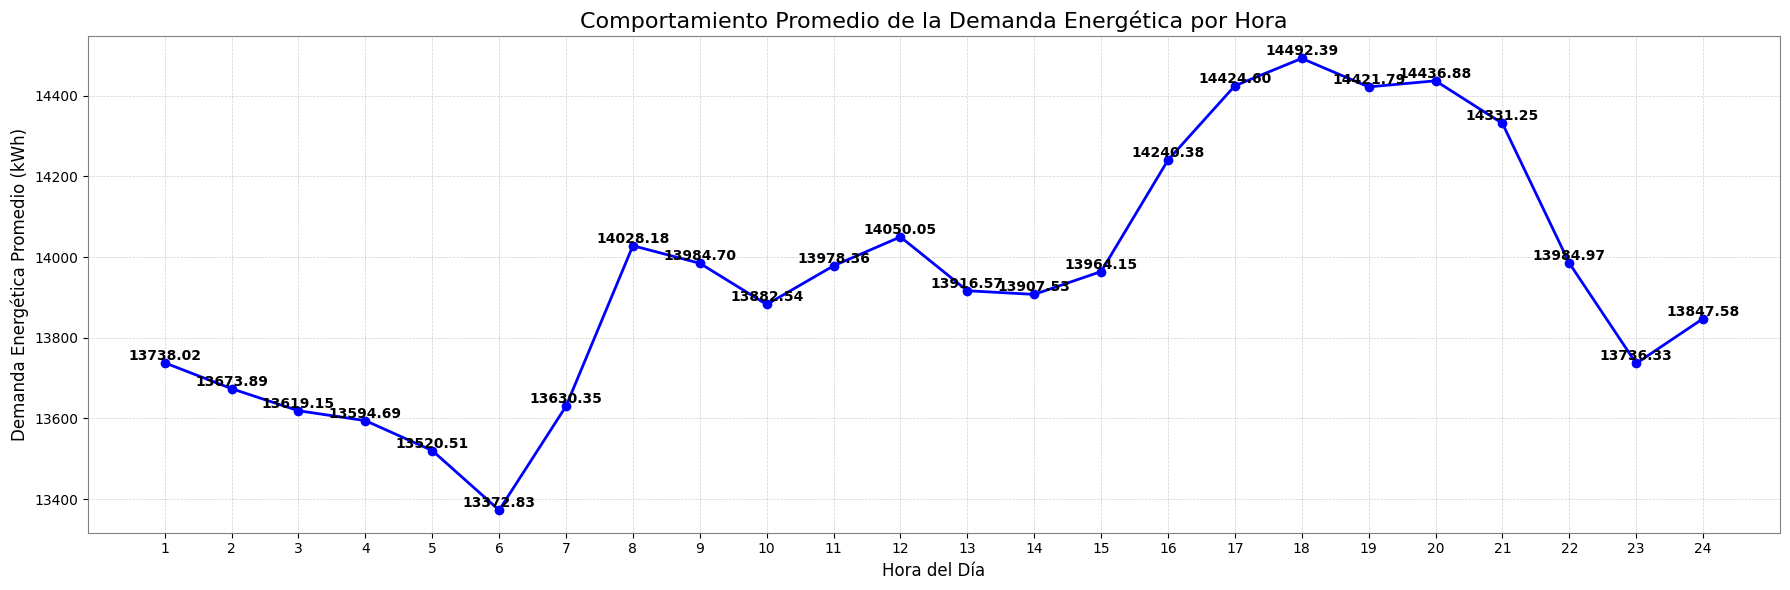

In [12]:
# Definir las columnas correspondientes a las horas del día (Values_Hour01, Values_Hour02, ..., Values_Hour24)
hour_columns = [f'Values_Hour{i:02}' for i in range(1, 25)]

# Calcular la demanda promedio por hora del día utilizando las columnas correspondientes
avg_hourly_demand = df_daily_reset[hour_columns].mean()


plt.figure(figsize=(18, 6))  
plt.plot(range(1, 25), avg_hourly_demand, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)
plt.title('Comportamiento Promedio de la Demanda Energética por Hora', fontsize=16)
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Demanda Energética Promedio (kWh)', fontsize=12)

plt.xticks(range(1, 25))
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.gca().spines['top'].set_color('gray')
plt.gca().spines['right'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['left'].set_color('gray')

for i, demand in enumerate(avg_hourly_demand, 1):  
    plt.text(i, demand + 0.1, f'{demand:.2f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
plt.tight_layout()
plt.show()


### Observaciones del Comportamiento de la Demanda Energética
(Industria Manufacturera de Productos Alimenticios):

* Pico de Demanda en la Tarde:
La demanda alcanza su máximo a las Hora 18, con 14,485.82 kWh, lo que indica el periodo de mayor actividad en la planta. Este pico podría estar relacionado con los procesos de mayor consumo energético, como el procesamiento y embalaje de productos, que tienden a intensificarse en la tarde.

* Demanda Baja al Iniciar el Día:
A las Hora 6, la demanda es la más baja, 13,366.11 kWh, lo que refleja la fase de arranque de la producción. Es posible que durante estas horas se realicen tareas de mantenimiento, preparación de equipos o puesta en marcha de líneas de producción.

* Incremento de Demanda Entre la Hora 6 y Hora 8:
Durante las Hora 6 a Hora 8, se observa un aumento notable en la demanda, alcanzando los 14,021.37 kWh. Esto sugiere que, a medida que avanza el día, la planta aumenta su producción y consumo energético, posiblemente debido a la activación de más maquinaria y el comienzo de la producción a gran escala.

* Estabilidad en la Noche:
A partir de la Hora 19, la demanda se estabiliza alrededor de los 14,300 kWh. Aunque la actividad productiva disminuye, la planta sigue operando, posiblemente con turnos nocturnos o actividades que requieren una cantidad constante de energía, como el mantenimiento o el almacenamiento de productos terminados.

### Conclusión:
El comportamiento de la demanda energética en la industria alimentaria presenta un patrón típico de menor demanda en las primeras horas del día, seguido de un incremento progresivo hasta el pico en la Hora 18, donde la producción alcanza su punto máximo. Después, la demanda se estabiliza por la noche, lo que refleja una leve desaceleración en las operaciones al final del turno. Este comportamiento sugiere que la planta optimiza sus recursos a lo largo del día, con picos de consumo bien definidos que podrían beneficiarse de una mejor planificación energética para reducir costos y mejorar la eficiencia operativa.

## 2 Análisis de la Distribución Porcentual de la Demanda Energética Total por Código CIIU en lo que va del Año

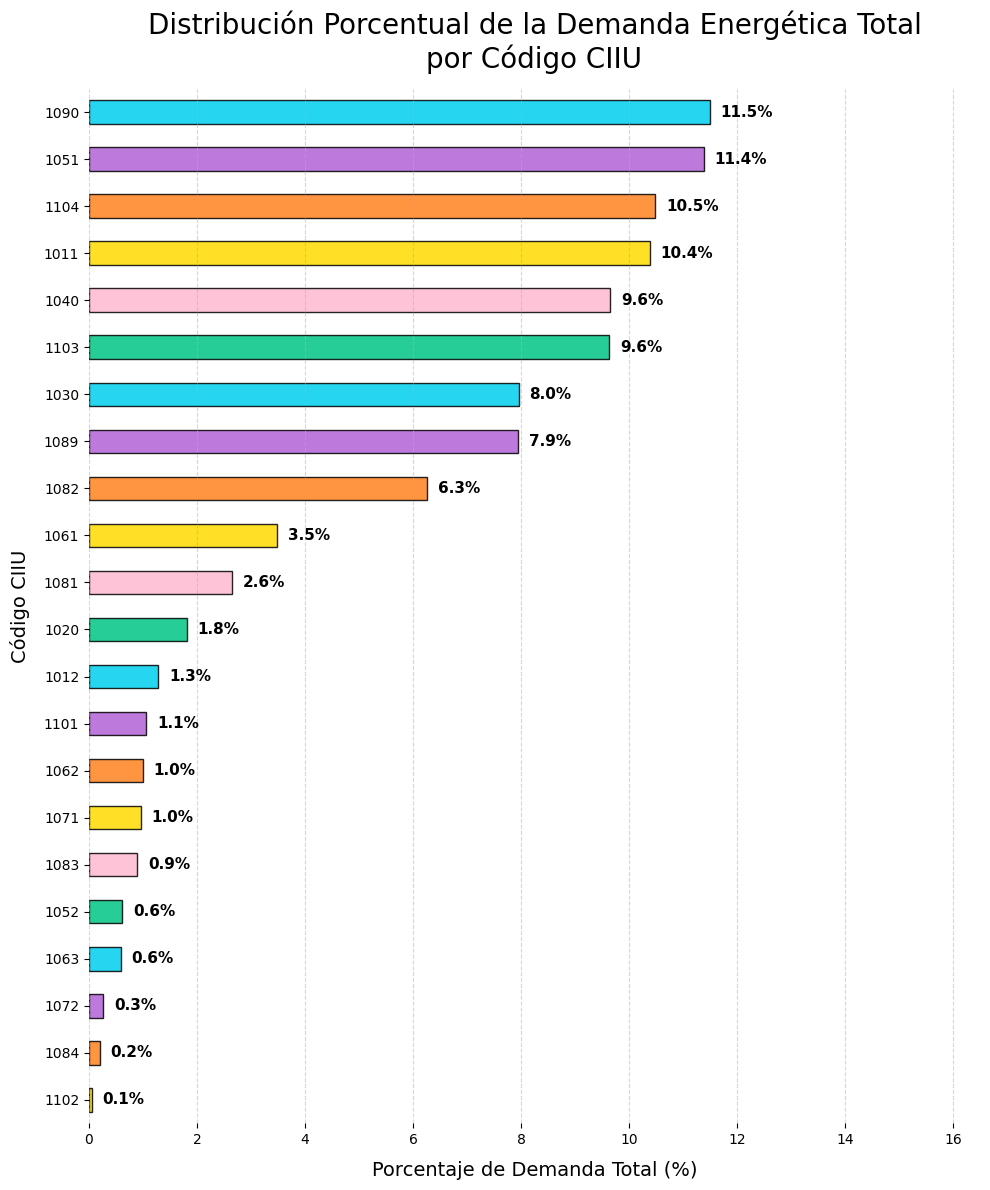

In [13]:
# Calcular la demanda total por código CIIU
df_total_by_ciiu = df_daily_reset.groupby('Values_code')['Total_Demanda_Dia'].sum()

# Calcular el porcentaje
total_demanda = df_total_by_ciiu.sum()
df_percent_by_ciiu = (df_total_by_ciiu / total_demanda) * 100

# Ordenar los datos
df_percent_sorted = df_percent_by_ciiu.sort_values()

custom_colors = ["#ffdb00", "#ff8120", "#b263d6", "#00ceee", "#01c585", "#ffb9d1"]
extended_colors = custom_colors * (len(df_percent_sorted) // len(custom_colors)) + custom_colors[:len(df_percent_sorted) % len(custom_colors)]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 12))
ax = df_percent_sorted.plot(kind='barh', color=extended_colors, edgecolor='black', alpha=0.85)

for i, v in enumerate(df_percent_sorted):
    ax.text(v + 0.2, i, f'{v:.1f}%', va='center', fontsize=11, color='black', fontweight='bold')

plt.title('Distribución Porcentual de la Demanda Energética Total\npor Código CIIU', 
          fontsize=20, pad=15)
plt.xlabel('Porcentaje de Demanda Total (%)', fontsize=14, labelpad=10)
plt.ylabel('Código CIIU', fontsize=14, labelpad=10)
plt.xlim(0, df_percent_sorted.max() + 5)
plt.subplots_adjust(left=0.3)
plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()



### Observaciones sobre la Distribución Porcentual de la Demanda Energética

1. El consumo energético más alto: se concentra en las siguientes actividades industriales: elaboración de alimentos para perros (1090), elaboración de productos para molinería (1051), elaboración de bebidas no alcohólicas, producción de aguas minerales y otras aguas embotelladas (1104) y procesamiento y conservación de carnes y productos cárnicos. Estas actividades representan un promedio del 43.8% de la demanda energética total, superando de manera significativa a otros sectores.

* Este patrón destaca una notable concentración de recursos en estas áreas industriales, lo que sugiere un alto grado de especialización en ellas. Esta tendencia puede ser indicativa de procesos de producción intensivos en energía y con una fuerte dependencia de la infraestructura energética para su funcionamiento eficiente.


2. Contraste significativo entre sectores: Existe una clara diferencia entre el mayor consumidor de energía (actividad 1090, elaboración de alimentos para perros, con un 11.5%) y el menor (1102, elaboración de bebidas fermentadas no destiladas, con un 0.1%), lo que resulta en una brecha de 11.4%. Este contraste subraya una distribución desigual del consumo energético entre los diferentes sectores.

* El bajo consumo energético en el sector de 1102, bebidas fermentadas no destiladas, podría deberse a que los procesos de fermentación requieren menos energía en comparación con otras actividades industriales. La fermentación, un proceso biológico impulsado por microorganismos, generalmente no requiere altas temperaturas ni equipos de gran consumo energético, lo que lo convierte en un proceso relativamente eficiente en términos de energía. Esta diferencia en los requisitos energéticos podría explicar la brecha en el consumo entre los sectores mencionados.

3.  Predominio de la industria alimentaria: Diversos sectores vinculados con la producción de alimentos (por ejemplo, CIIU 1090, 1051, 1104) presentan una alta demanda energética, con participaciones superiores al 10%. Esto refuerza la posición de la industria alimentaria como el principal consumidor de energía entre los códigos CIIU, destacándose como un área clave para cualquier estrategia de optimización energética.

### Conclusión

La demanda energética se concentra principalmente en sectores específicos, sobre todo en la elaboración de alimentos para perros. Esto sugiere que cualquier estrategia de eficiencia energética debería centrarse prioritariamente en este sector para maximizar el impacto en la optimización del consumo total. Los sectores con baja demanda podrían abordar su consumo energético con medidas más específicas y menos urgentes, permitiendo un enfoque más equilibrado y eficiente en la gestión de la energía.

## 3 Mapa de Calor de la Demanda Energética por Código CIIU y Mes

In [14]:

custom_cmap = LinearSegmentedColormap.from_list(
    'activity_cmap',
    ['#00ceee', '#ffdb00'] 
)

plt.figure(figsize=(12, 8))

# Crear el mapa de calor
sns.heatmap(
    df_pivot, 
    annot=True, 
    cmap=custom_cmap, 
    fmt='.2f', 
    cbar_kws={'label': 'Demanda Energética (%)'}
)

plt.title('Mapa de Calor de la Demanda Energética por Código CIIU por Mes', fontsize=16, pad=15)
plt.xlabel('Mes', fontsize=12, labelpad=10)
plt.ylabel('Código CIIU', fontsize=12, labelpad=10)
plt.show()




NameError: name 'LinearSegmentedColormap' is not defined

### Observaciones sobre la Demanda Energética por Código CIIU y Mes
1. Alta demanda energética en sectores de conservación y bebidas:
* 1011 (Procesamiento y conservación de carne y productos cárnicos) y 1015 (Elaboración de productos lácteos) destacan con altos valores, probablemente debido al uso intensivo de refrigeración, equipos de procesamiento y otros sistemas de conservación.

* 1104 (Elaboración de bebidas no alcohólicas y aguas embotelladas) también presenta altos valores, lo que puede atribuirse al consumo energético para procesos de embotellado y tratamiento de agua.

2. Estacionalidad en la demanda:
* 1015 (Productos lácteos) tiene un pico notable en el mes 8 (13.65%), lo que podría relacionarse con aumentos de producción durante temporadas específicas.

* Los sectores como 1104 (Bebidas no alcohólicas) también presentan fluctuaciones que podrían coincidir con cambios en el consumo estacional (verano o temporadas festivas).

3. Baja demanda en sectores específicos:

* Actividades como 1072 (Elaboración de panela) y 1084 (Comidas y platos preparados) tienen demandas energéticas consistentemente bajas, lo que sugiere procesos menos intensivos en energía.
Patrones estables en algunos sectores:

* 1020 (Procesamiento de frutas, legumbres, hortalizas y tubérculos) y 1082 (Elaboración de cacao y productos de confitería) muestran estabilidad en la demanda energética mensual, indicando procesos uniformes durante todo el año.

### Conclusiones:
Sectores prioritarios para mejora de eficiencia energética:

1011, 1015 y 1104 son actividades que deberían ser priorizadas en estrategias de eficiencia energética debido a su alta y sostenida demanda, lo que podría generar importantes ahorros si se optimizan procesos clave.
Estacionalidad y planificación de recursos:

Los sectores con fluctuaciones estacionales, como 1015 y 1104, necesitan estrategias de gestión energética específicas para cubrir los picos de demanda y evitar sobrecargas o costos adicionales en estas épocas.


## 4 Demanda energética por mes 

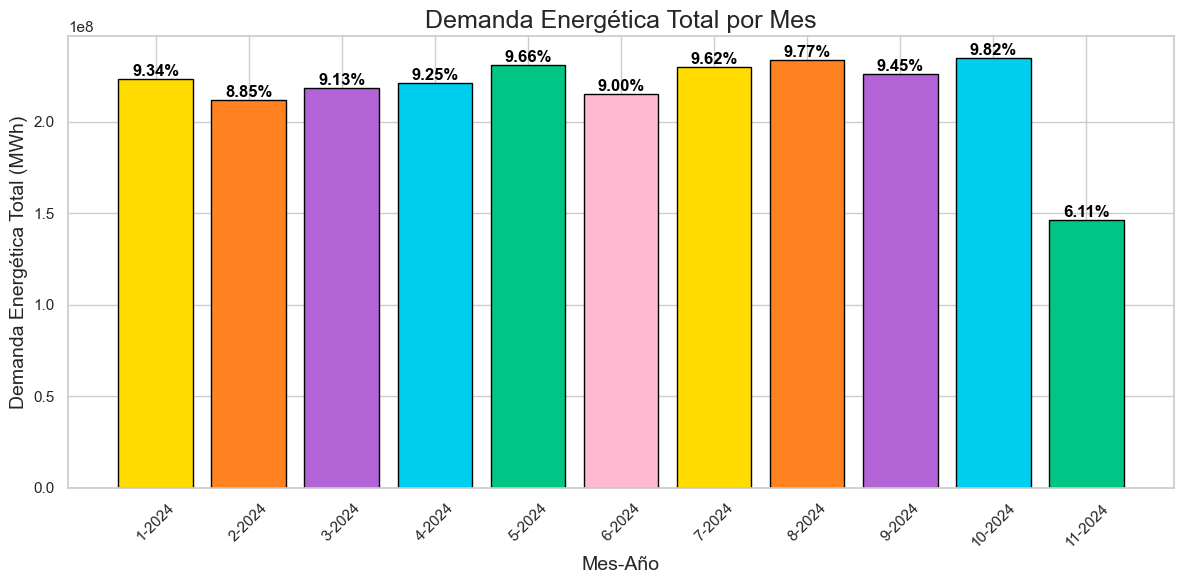

In [ ]:
df_daily_reset['Date'] = pd.to_datetime(df_daily_reset['Date'])
df_daily_reset['Month'] = df_daily_reset['Date'].dt.month
df_daily_reset['Year'] = df_daily_reset['Date'].dt.year
df_monthly_demand = df_daily_reset.groupby(['Year', 'Month'])['Total_Demanda_Dia'].sum().reset_index()

# Demanda total por el periodo completo
total_demand = df_monthly_demand['Total_Demanda_Dia'].sum()

# Porcentaje de la demanda por mes
df_monthly_demand['Percentage'] = (df_monthly_demand['Total_Demanda_Dia'] / total_demand) * 100


custom_colors = ["#ffdb00", "#ff8120", "#b263d6", "#00ceee", "#01c585", "#ffb9d1"]
plt.figure(figsize=(12, 6))
bars = plt.bar(df_monthly_demand['Month'].astype(str) + '-' + df_monthly_demand['Year'].astype(str),
               df_monthly_demand['Total_Demanda_Dia'], color=custom_colors[:len(df_monthly_demand)], edgecolor='black')
plt.title('Demanda Energética Total por Mes', fontsize=18)
plt.xlabel('Mes-Año', fontsize=14)
plt.ylabel('Demanda Energética Total (MWh)', fontsize=14)


for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total_demand) * 100 
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1000, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Observaciones sobre la Demanda Energética

1. Meses de Alta Demanda Energética
Los meses de mayo (9.66%), agosto (9.77%) y octubre (9.82%) presentan los mayores niveles de consumo energético. Esto podría deberse a varios factores:
     * Factores Económicos: Es posible que haya un aumento en la actividad productiva, especialmente en sectores industriales clave que requieren más energía durante estos meses.

     * Cosechas o Ciclos Agrícolas: La demanda energética también podría verse influida por la intensificación de actividades en sectores como la agricultura, donde productos clave como el café y otros alimentos requieren mayor consumo energético en sus procesos de producción o procesamiento.

2. Mes de Menor Demanda Energética (Noviembre) 
     * Con los datos disponibles hasta el 25 de noviembre, el mes muestra una caída significativa en la demanda energética, alcanzando un 6.11%. Sin embargo, es importante destacar que este patrón podría cambiar conforme se completen los datos del mes.

3. Estabilidad Relativa en la Demanda a lo Largo del Año
     * A excepción del mes de noviembre, los demás meses mantienen una demanda energética relativamente constante, con variaciones menores que oscilan entre 8.85% y 9.82%.

### Conclusiones: 
Factores Económicos y Productivos como Principales Impulsores del Consumo: El consumo energético en Colombia está más relacionado con la actividad económica, especialmente en sectores como la industria, agricultura y comercio, que con factores climáticos. Las fluctuaciones en la demanda parecen estar influenciadas principalmente por cambios en la producción, las cosechas y eventos nacionales

Dado que los datos analizados solo cubren hasta la fecha mencionada, es posible que esta tendencia cambie a medida que avance el mes. Un aumento en la demanda energética podría registrarse en las últimas semanas de noviembre, especialmente a medida que las actividades comerciales y de consumo se intensifiquen antes de las festividades de fin de año.

## 5 Promedio de Demanda Energética en la Semana con Relación a la Industria Manufacturera de Alimentos

_Este análisis muestra cómo varía la demanda energética diaria a lo largo de la semana en sectores relacionados con la elaboración de productos alimenticios. El gráfico de barras te permitirá identificar los días con mayor y menor demanda energética._

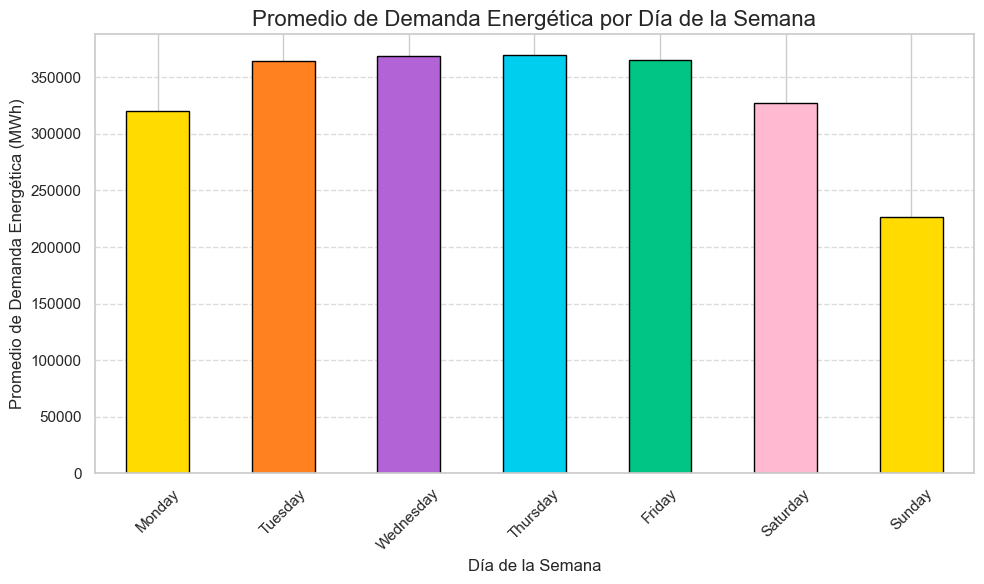

In [ ]:
df_daily_reset['Day_of_Week'] = pd.to_datetime(df_daily_reset['Date']).dt.day_name()

# Agrupar por día de la semana y calcular el promedio de 'Total_Demanda_Dia'
avg_demand_per_day = df_daily_reset.groupby('Day_of_Week')['Total_Demanda_Dia'].mean()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_demand_per_day = avg_demand_per_day.reindex(days_order)


custom_colors = ["#ffdb00", "#ff8120", "#b263d6", "#00ceee", "#01c585", "#ffb9d1"]
plt.figure(figsize=(10, 6))
avg_demand_per_day.plot(kind='bar', color=custom_colors, edgecolor='black')
plt.title('Promedio de Demanda Energética por Día de la Semana', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Promedio de Demanda Energética (MWh)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



###  Promedio de la demanda energetica por DIA de la semana 
1. Mayor demanda entre martes y jueves:
     La industria manufacturera enfocada en la elaboración de productos alimenticios presenta los niveles más altos de consumo energético entre martes y jueves. Esto indica que estos días concentran la mayor parte de las actividades productivas, posiblemente debido a la preparación y distribución de productos para satisfacer la demanda del mercado.

2. Demanda significativamente baja los domingos:
     El domingo muestra el menor consumo energético de la semana, lo que sugiere una reducción considerable en las operaciones de producción. Este comportamiento puede estar relacionado con pausas planificadas, descanso del personal o mantenimiento de equipos.

Conclusión:
El patrón de demanda energética refleja una alta concentración de actividades productivas entre semana, particularmente en los días intermedios, y una disminución hacia el fin de semana, alcanzando su punto más bajo el domingo. Esto sugiere que la planificación operativa y energética de la industria alimenticia sigue un ciclo alineado con los días laborables y descansos estándar.
